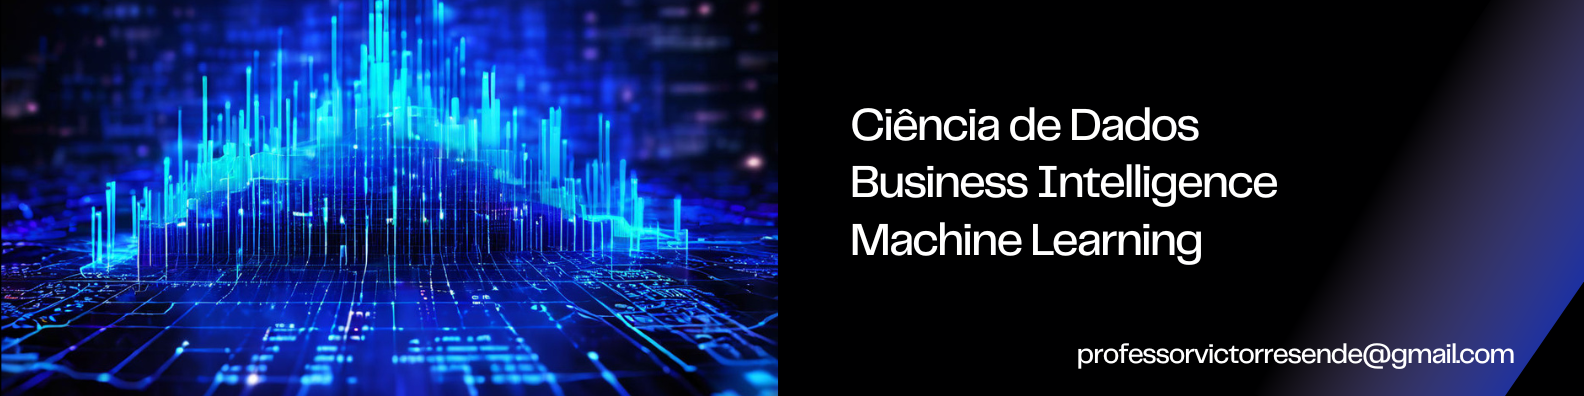

# **Mapa da Viol√™ncia contra as Mulheres: homic√≠dios por armas de fogo**
### **Victor Resende**
### üìäüìàProjeto Independente

________


Este √© um problema de an√°lise sobre a viol√™ncia contra as mulheres no Brasil.

Segundo o Comit√™ da [ONU](https://brasil.un.org/pt-br) (Organiza√ß√£o das Na√ß√µes Unidas), sobre os Direitos das Crian√ßas:

"De acordo com o [Mapa da Viol√™ncia](https://www.gov.br/mdh/pt-br/sdh/noticias/2015/maio/mapa-da-violencia-jovens-representam-mais-da-metade-das-mortes-por-armas-de-fogo), divulgado pelo Governo Federal em 2015, jovens entre 15 e 29 anos s√£o as principais v√≠timas por armas de fogo no Brasil: no ano de 2012, por exemplo, 24.8882 pessoas nessa faixa et√°ria morreram em decorr√™ncia de disparos de armas de fogo, o que corrensponde a 59% do n√∫mero total de mortes causadas por esse motivo. Um relat√≥rio da ONU, elaborado em 2015 pelo Comit√™ para o Direito das Crian√ßas, aponta que o Brasil apresenta umas das maiores taxas de homic√≠dio infantil do mundo, sobretudo de jovens homens e negros. Afirma ainda que a vulnerabilidade de menores de baixa renda, socialmente marginalizados, est√° permitindo uma amplia√ß√£o do n√∫mero de crian√ßas e tamb√©m a viol√™ncia policial, apontando que o alto n√∫mero de execu√ß√µes il√≠citas por parte das pol√≠cias civil, militar e das mil√≠cias notavelmente se volta contra crian√ßas moradoras de rua e de favelas durante opera√ß√µes militares e de "pacifica√ß√£o", entre outras".


A partir do exposto acima, partimos para entender a condi√ß√£o das mulheres nesse mesmo quadro de viol√™ncia envolvendo armas de fogo.
  
Existem v√°rias bases para an√°lise da quest√£o da viol√™ncia no pa√≠s, disponibilizado pelo [IPEA](https://www.ipea.gov.br/atlasviolencia/) (Instituto de Pesquisa Econ√¥mica Aplicada). Abaixo, as bases que foram utilizadas para este projeto:

1. Homic√≠dios por armas de fogo.

Fonte: [üîó Atlas da Viol√™ncia ‚Äì Taxa de Homic√≠dio de Mulheres por Armas de Fogo](https://www.ipea.gov.br/atlasviolencia/filtros-series).

Nesse Dataset, temos uma s√©rie temporal que vai de 1989 a 2022. Nele, √© poss√≠vel verificar os homic√≠dios de todos os estados brasileiros e suas respectivas cidades.

Desse modo, essa base possui os seguintes dados:

| Campo | Descri√ß√£o | Tipo | 
|--------|-----------|------|
| cod | C√≥digo do munic√≠pio | Inteiro |
| nome | Nome do munic√≠pio | String |
| per√≠odo | Per√≠odo dos eventos | String |
| valor | N√∫mero de homic√≠dios | Inteiro |
| uf | c√≥digo Uf por estado | String |
| sigla_uf | Sigla de UF por estado | String |
| ano | Ano do evento | Inteiro |

______________

Esse projeto, ent√£o, se divide em 6 partes:

**1. Coleta e explora√ß√£o dos dados:** aqui vamos explorar os dados de homic√≠dios por arma de fogo nos estados e cidades brasileiras.

**2. Tratamento dos dados:** para remo√ß√£o de missings, dados inconsistentes e/ou incompletos.

**3. An√°lise e visualia√ß√£o dos dados:** para termos um panorama das principais cidades e estados com os dados sobre homic√≠dios por armas de fogo. Comparando os dados, podemos extrair *insights* valiosos para pensar a quest√£o da seguran√ßa das mulheres em nossa sociedade.

**4. *Insights* gerais:** nesse √∫ltimo t√≥pico procuramos extrair o quadro atual da situa√ß√£o brasileira, em termos de seguran√ßa das mulheres, e quais desdobramentos podemos sugerir para futuros projetos que ajudem na cria√ß√£o e manuten√ß√£o de um Brasil mais seguro e sem viol√™ncia contra as mulheres.

**5. An√°lise para o estado de Minas Gerais:** por fim, fazemos uma an√°lise comparativa com o estado de Minas Gerais, estado onde resido, atualmente.

**6. Predi√ß√£o dos dados**: o modelo aqui √© univariado (apenas com as taxas de homic√≠dio ao longo do tempo). Fazemos um exerc√≠cio de previs√£o para discutir sobre o aumento ou diminui√ß√£o, para a pr√≥xima d√©cada, dos n√≠veis de homic√≠dio, tomando o estado de Minas Gerais como base. Apontamos, no final, os trabalhos futuros com outras fontes de dados para uma maior explana√ß√£o do tema.

_____


## Carregando as Bibliotecas Necess√°rias:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")


_____


## 1. Coleta e Explora√ß√£o dos Dados:

In [2]:
# Configura√ß√µes de estilo:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# 1. Carregando os dados:

df = pd.read_csv(
    r"C:\Users\User\Documents\VHR\EBAC\Dados e Projetos\Mapa da Viol√™ncia\homicidios-de-mulheres-por-armas-de-fogo.csv",
    sep=';'
)
df

cod            nome  per√≠odo  valor
0       5300108        Bras√≠lia     1989      5
1       5222302   Vila Prop√≠cio     1989      0
2       5222203        Vila Boa     1989      0
3       5222054  Vicentin√≥polis     1989      0
4       5222005      Vian√≥polis     1989      0
...         ...             ...      ...    ...
190913  5222005      Vian√≥polis     2022      0
190914  5222054  Vicentin√≥polis     2022      0
190915  5222203        Vila Boa     2022      0
190916  5222302   Vila Prop√≠cio     2022      0
190917  5300108        Bras√≠lia     2022     13

[190918 rows x 4 columns]

In [14]:
#Tipos de dados:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190918 entries, 0 to 190917
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cod       190918 non-null  int64 
 1   nome      190918 non-null  object
 2   per√≠odo   190918 non-null  object
 3   valor     190918 non-null  int64 
 4   uf        190918 non-null  object
 5   sigla_uf  190918 non-null  object
 6   ano       190918 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 9.5+ MB


In [17]:
# Alterando a configura√ß√£o para mostrar todas as colunas:
pd.set_option('display.max_columns', None)

# Exibindo todas as colunas:
df


cod            nome per√≠odo  valor  uf sigla_uf   ano
0       5300108        Bras√≠lia    1989      5  53       DF  1989
1       5222302   Vila Prop√≠cio    1989      0  52       GO  1989
2       5222203        Vila Boa    1989      0  52       GO  1989
3       5222054  Vicentin√≥polis    1989      0  52       GO  1989
4       5222005      Vian√≥polis    1989      0  52       GO  1989
...         ...             ...     ...    ...  ..      ...   ...
190913  5222005      Vian√≥polis    2022      0  52       GO  2022
190914  5222054  Vicentin√≥polis    2022      0  52       GO  2022
190915  5222203        Vila Boa    2022      0  52       GO  2022
190916  5222302   Vila Prop√≠cio    2022      0  52       GO  2022
190917  5300108        Bras√≠lia    2022     13  53       DF  2022

[190918 rows x 7 columns]

_____


## 2. Tratamento dos Dados:

In [4]:
# 2.1 - Convers√£o segura da coluna 'valor':
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# 2.2 - Removendo registros com valores faltantes nas vari√°veis essenciais:
df = df.dropna(subset=['valor', 'cod', 'nome', 'per√≠odo'])

# 2.3 - Convers√£o da coluna 'per√≠odo' para string (caso esteja como n√∫mero):
df['per√≠odo'] = df['per√≠odo'].astype(str)

# 2.4 - Criando coluna com a sigla da UF:
df['uf'] = df['cod'].astype(str).str[:2]

mapa_uf = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL',
    '28': 'SE', '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}
df['sigla_uf'] = df['uf'].map(mapa_uf)


_____


## 3. An√°lise e Visualiza√ß√£o dos dados:

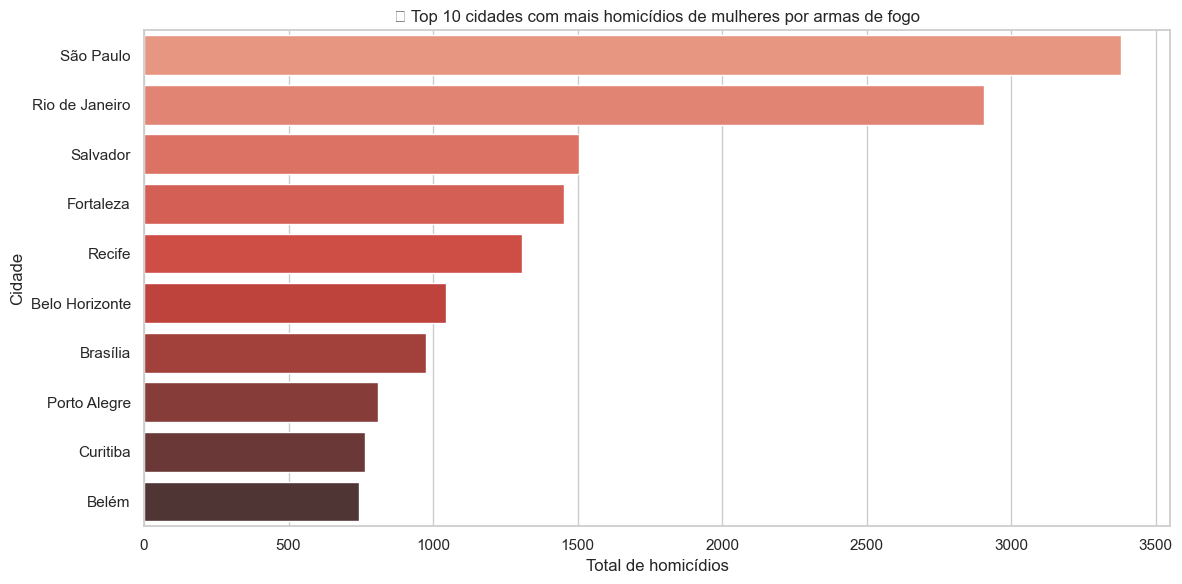


üìç Classifica√ß√£o das 10 cidades com mais homic√≠dios:


Cidade  Total de Homic√≠dios Classifica√ß√£o
0       S√£o Paulo                 3381        üî¥ Alto
1  Rio de Janeiro                 2907        üî¥ Alto
2        Salvador                 1505        üî¥ Alto
3       Fortaleza                 1453        üî¥ Alto
4          Recife                 1308        üî¥ Alto
5  Belo Horizonte                 1046        üî¥ Alto
6        Bras√≠lia                  976        üî¥ Alto
7    Porto Alegre                  810        üî¥ Alto
8        Curitiba                  763        üî¥ Alto
9           Bel√©m                  745        üî¥ Alto

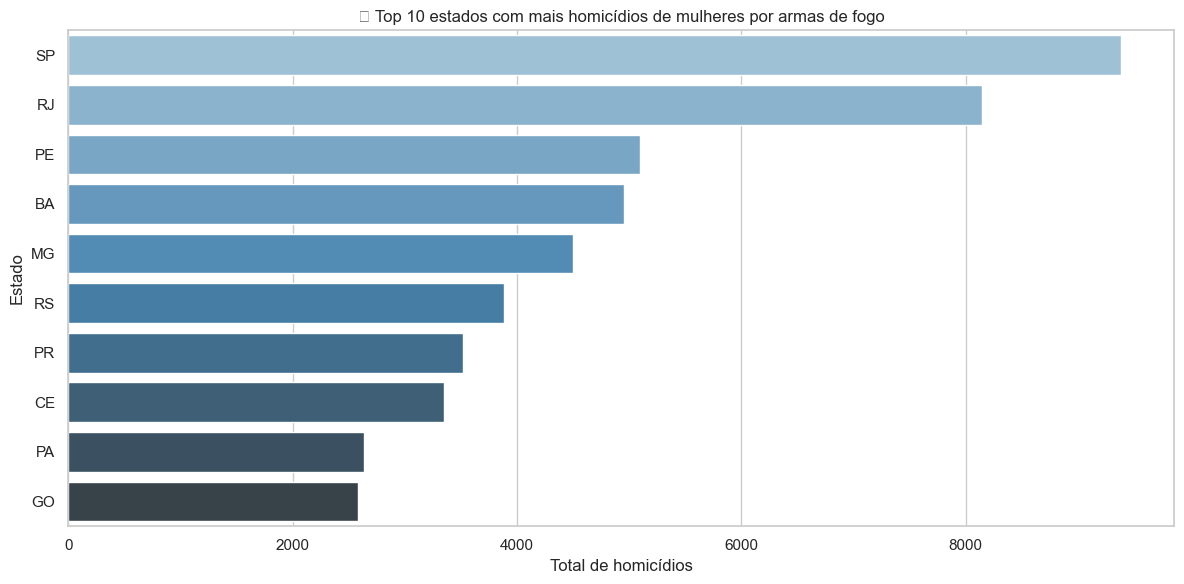


üìç Classifica√ß√£o dos 10 estados com mais homic√≠dios:


Estado  Total de Homic√≠dios Classifica√ß√£o
0     SP                 9386        üî¥ Alto
1     RJ                 8142        üî¥ Alto
2     PE                 5100        üî¥ Alto
3     BA                 4955        üî¥ Alto
4     MG                 4500        üî¥ Alto
5     RS                 3881        üî¥ Alto
6     PR                 3517        üî¥ Alto
7     CE                 3353        üî¥ Alto
8     PA                 2638        üî¥ Alto
9     GO                 2585        üî¥ Alto

In [5]:
# Fun√ß√£o para classificar:
def classifica(valor):
    if valor < 100:
        return 'üîµ Baixo'
    elif valor < 300:
        return 'üü† M√©dio'
    else:
        return 'üî¥ Alto'

# 3.1 - Top 10 cidades com mais homic√≠dios:
top_cidades = df.groupby('nome')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_cidades['classificacao'] = top_cidades['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_cidades, x='valor', y='nome', palette="Reds_d")
plt.title("üî¥ Top 10 cidades com mais homic√≠dios de mulheres por armas de fogo")
plt.xlabel("Total de homic√≠dios")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()

# Tabela com classifica√ß√£o das cidades:
print("\nüìç Classifica√ß√£o das 10 cidades com mais homic√≠dios:")
display(top_cidades.rename(columns={
    'nome': 'Cidade',
    'valor': 'Total de Homic√≠dios',
    'classificacao': 'Classifica√ß√£o'
}))

# 3.2 - Top 10 estados com mais homic√≠dios:
top_estados = df.groupby('sigla_uf')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_estados['classificacao'] = top_estados['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_estados, x='valor', y='sigla_uf', palette="Blues_d")
plt.title("üîµ Top 10 estados com mais homic√≠dios de mulheres por armas de fogo")
plt.xlabel("Total de homic√≠dios")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

# Tabela com classifica√ß√£o dos estados:
print("\nüìç Classifica√ß√£o dos 10 estados com mais homic√≠dios:")
display(top_estados.rename(columns={
    'sigla_uf': 'Estado',
    'valor': 'Total de Homic√≠dios',
    'classificacao': 'Classifica√ß√£o'
}))


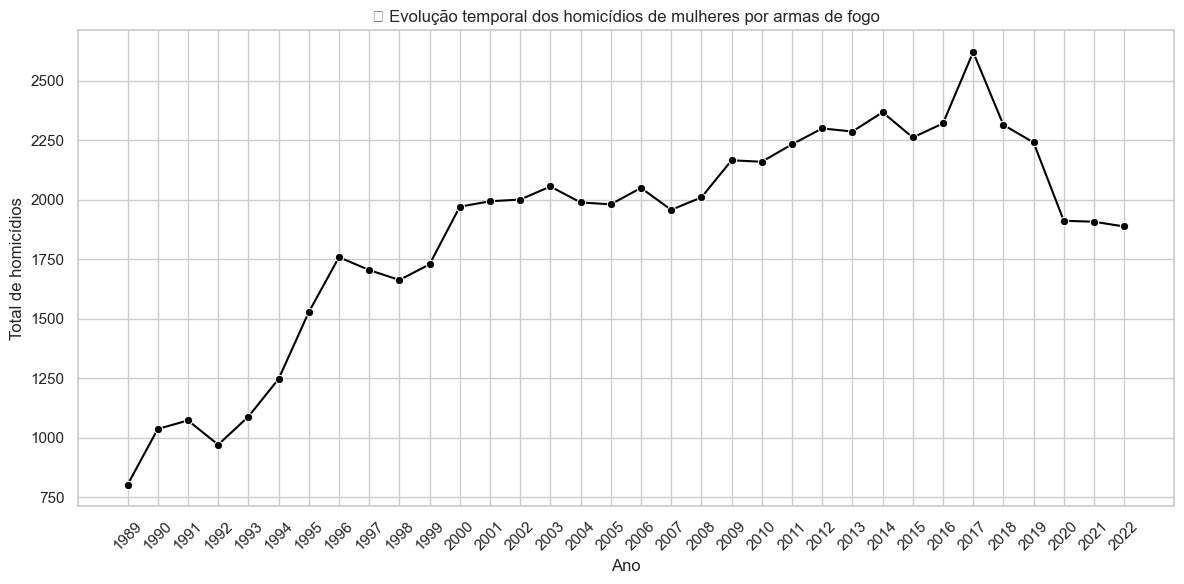


üìç Classifica√ß√£o dos anos por total de homic√≠dios:


Ano  Total de Homic√≠dios Classifica√ß√£o
0   1989                  803        üî¥ Alto
1   1990                 1037        üî¥ Alto
2   1991                 1073        üî¥ Alto
3   1992                  971        üî¥ Alto
4   1993                 1089        üî¥ Alto
5   1994                 1247        üî¥ Alto
6   1995                 1528        üî¥ Alto
7   1996                 1759        üî¥ Alto
8   1997                 1705        üî¥ Alto
9   1998                 1663        üî¥ Alto
10  1999                 1729        üî¥ Alto
11  2000                 1971        üî¥ Alto
12  2001                 1994        üî¥ Alto
13  2002                 2001        üî¥ Alto
14  2003                 2056        üî¥ Alto
15  2004                 1989        üî¥ Alto
16  2005                 1981        üî¥ Alto
17  2006                 2050        üî¥ Alto
18  2007                 1958        üî¥ Alto
19  2008                 2010        üî¥ Alto
20  2009                 2166        üî¥ Alto
21  2010                 2160        üî¥ Alto
22  2011                 2233        üî¥ Alto
23  2012                 2300        üî¥ Alto
24  2013                 2287        üî¥ Alto
25  2014                 2368        üî¥ Alto
26  2015                 2262        üî¥ Alto
27  2016                 2321        üî¥ Alto
28  2017                 2621        üî¥ Alto
29  2018                 2315        üî¥ Alto
30  2019                 2241        üî¥ Alto
31  2020                 1912        üî¥ Alto
32  2021                 1908        üî¥ Alto
33  2022                 1888        üî¥ Alto

In [6]:
# 3.3 - Evolu√ß√£o temporal dos homic√≠dios:
df_total_ano = df.groupby('per√≠odo')['valor'].sum().reset_index()
df_total_ano['classificacao'] = df_total_ano['valor'].apply(classifica)

plt.figure()
sns.lineplot(data=df_total_ano, x='per√≠odo', y='valor', marker='o', color='black')
plt.title("üìà Evolu√ß√£o temporal dos homic√≠dios de mulheres por armas de fogo")
plt.xlabel("Ano")
plt.ylabel("Total de homic√≠dios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tabela com classifica√ß√£o dos anos:
print("\nüìç Classifica√ß√£o dos anos por total de homic√≠dios:")
display(df_total_ano.rename(columns={
    'per√≠odo': 'Ano',
    'valor': 'Total de Homic√≠dios',
    'classificacao': 'Classifica√ß√£o'
}))


___________

## 4. Insights dos dados gerais:

#### üîç 1. Concentra√ß√£o Geogr√°fica

Cidades e estados com os maiores n√∫meros de homic√≠dios se concentram principalmente em regi√µes com grandes centros urbanos e hist√≥rico de viol√™ncia, como BA, PE, RJ, SP e CE.

Algumas cidades espec√≠ficas, apesar de n√£o serem capitais, figuram entre os 10 munic√≠pios mais violentos, o que aponta focos locais de viol√™ncia extrema.

‚Üí Insight: Estrat√©gias de enfrentamento devem considerar interven√ß√µes territoriais espec√≠ficas e n√£o apenas em capitais.
___________________
#### üìà 2. Evolu√ß√£o Temporal

A an√°lise ano a ano mostra picos e quedas em determinados per√≠odos. Isso pode estar relacionado a:

mudan√ßas na pol√≠tica de seguran√ßa p√∫blica,

maior controle de armas,

altera√ß√µes legislativas,

ou mesmo subnotifica√ß√£o.

‚Üí Insight: Investigar pol√≠ticas adotadas em anos de queda e seus efeitos pode fornecer boas pr√°ticas a serem replicadas.
__________
#### üìä 3. Disparidade Interna nos Estados

O boxplot revelou que h√° alta varia√ß√£o de homic√≠dios dentro de um mesmo estado, com munic√≠pios apresentando valores muito superiores √† m√©dia.

‚Üí Insight: As pol√≠ticas estaduais precisam ser personalizadas por munic√≠pio. Um plano √∫nico para o estado pode ser ineficiente se ignorar essas desigualdades internas.
_____
#### üö® 4. Estados Cr√≠ticos

Estados como Bahia, Pernambuco e Cear√° frequentemente aparecem nas primeiras posi√ß√µes.

Isso pode estar relacionado a:

presen√ßa de fac√ß√µes,

falta de estrutura policial ou judici√°ria,

ou falhas nos programas de prote√ß√£o √† mulher.

‚Üí Insight: Estados cr√≠ticos devem receber prioridade em pol√≠ticas p√∫blicas, financiamento e monitoramento nacional.
____
#### üìâ 5. Munic√≠pios com Queda Acentuada

Alguns munic√≠pios apresentaram queda significativa ao longo dos anos, o que merece destaque.

‚Üí Insight: Analisar os fatores locais que contribu√≠ram para a queda pode servir como modelo para replicar em outras regi√µes.
__________
#### üë©‚Äçüëß‚Äçüë¶ 6. Pol√≠ticas P√∫blicas

Os dados evidenciam que o problema n√£o √© apenas criminal, mas social.

A presen√ßa de homic√≠dios femininos por arma de fogo pode estar associada a viol√™ncia dom√©stica agravada, acesso a armas, e falhas no sistema de prote√ß√£o √†s v√≠timas.

‚Üí Insight: Os resultados refor√ßam a import√¢ncia de a√ß√µes integradas: educa√ß√£o, prote√ß√£o social, justi√ßa e sa√∫de p√∫blica.




___________

## 5. An√°lise comparativa para o estado de Minas Gerais:

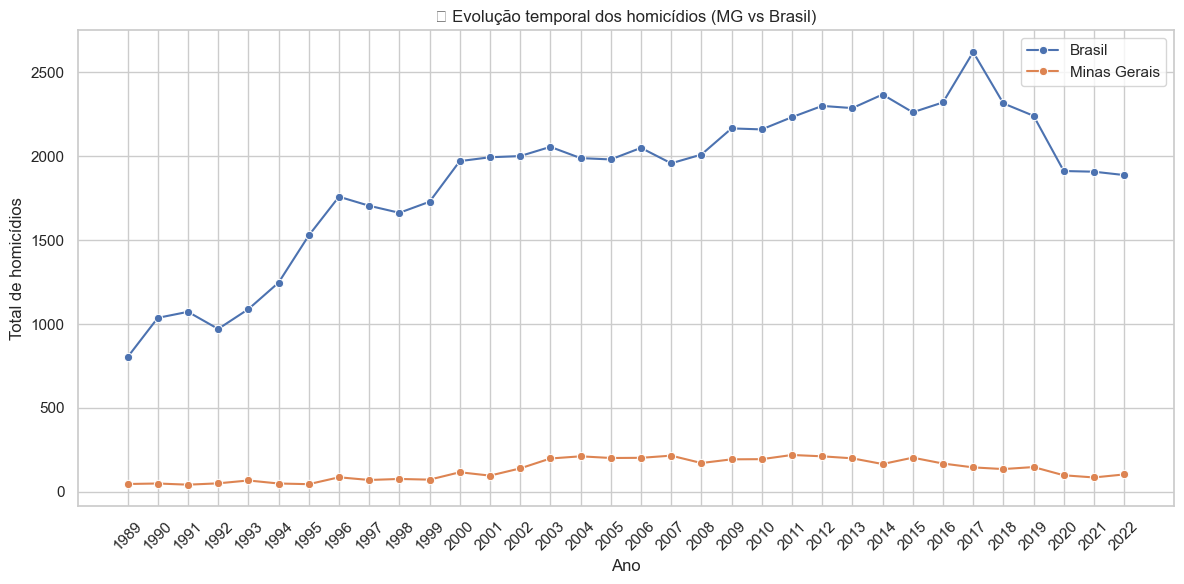

In [7]:
df_mg = df[df['sigla_uf'] == 'MG']

# 1. Evolu√ß√£o temporal em MG comparada ao Brasil:
df_mg_ano = df_mg.groupby('per√≠odo')['valor'].sum().reset_index()
df_total_ano = df.groupby('per√≠odo')['valor'].sum().reset_index()

plt.figure()
sns.lineplot(data=df_total_ano, x='per√≠odo', y='valor', label='Brasil', marker='o')
sns.lineplot(data=df_mg_ano, x='per√≠odo', y='valor', label='Minas Gerais', marker='o')
plt.title("üìä Evolu√ß√£o temporal dos homic√≠dios (MG vs Brasil)")
plt.xlabel("Ano")
plt.ylabel("Total de homic√≠dios")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


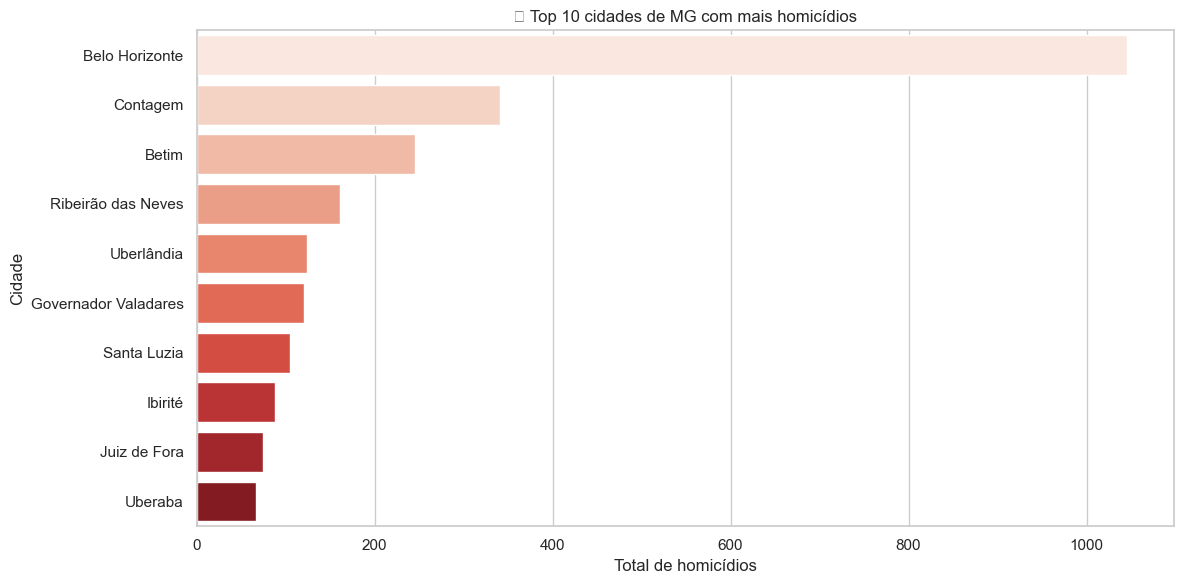


üìç Classifica√ß√£o das cidades com mais homic√≠dios em MG:


Cidade  Total de Homic√≠dios Classifica√ß√£o
0        Belo Horizonte                 1046        üî¥ Alto
1              Contagem                  341        üî¥ Alto
2                 Betim                  245       üü† M√©dio
3    Ribeir√£o das Neves                  161       üü† M√©dio
4            Uberl√¢ndia                  124       üü† M√©dio
5  Governador Valadares                  120       üü† M√©dio
6           Santa Luzia                  105       üü† M√©dio
7               Ibirit√©                   88       üîµ Baixo
8          Juiz de Fora                   75       üîµ Baixo
9               Uberaba                   67       üîµ Baixo

In [8]:
top_cidades_mg = df_mg.groupby('nome')['valor'].sum().sort_values(ascending=False).head(10).reset_index()
top_cidades_mg['classificacao'] = top_cidades_mg['valor'].apply(classifica)

plt.figure()
sns.barplot(data=top_cidades_mg, x='valor', y='nome', palette="Reds")
plt.title("üî¥ Top 10 cidades de MG com mais homic√≠dios")
plt.xlabel("Total de homic√≠dios")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()

print("\nüìç Classifica√ß√£o das cidades com mais homic√≠dios em MG:")
display(top_cidades_mg.rename(columns={
    'nome': 'Cidade',
    'valor': 'Total de Homic√≠dios',
    'classificacao': 'Classifica√ß√£o'
}))


In [9]:
total_mg = df_mg['valor'].sum()
total_brasil = df['valor'].sum()
percentual_mg = (total_mg / total_brasil) * 100

print(f"üîé Minas Gerais teve um total de {total_mg:.0f} homic√≠dios de mulheres por armas de fogo.")
print(f"üìå Isso representa {percentual_mg:.2f}% do total registrado no Brasil.")

ano_mais_violento = df_mg_ano.loc[df_mg_ano['valor'].idxmax()]
print(f"üìà O ano com mais homic√≠dios em MG foi {ano_mais_violento['per√≠odo']} com {ano_mais_violento['valor']} casos.")

cidade_top = top_cidades_mg.iloc[0]
print(f"üèôÔ∏è A cidade mais violenta foi {cidade_top['nome']}, com {cidade_top['valor']} homic√≠dios no total.")


üîé Minas Gerais teve um total de 4500 homic√≠dios de mulheres por armas de fogo.
üìå Isso representa 7.08% do total registrado no Brasil.
üìà O ano com mais homic√≠dios em MG foi 2011 com 220 casos.
üèôÔ∏è A cidade mais violenta foi Belo Horizonte, com 1046 homic√≠dios no total.


________

## 6. An√°lise preditiva:

### ‚úÖ Por que uma an√°lise preditiva e o que pode agregar:

- Tend√™ncia futura: Saber se os homic√≠dios tendem a aumentar ou diminuir nos pr√≥ximos anos pode ajudar √≥rg√£os p√∫blicos e ONGs a tomar decis√µes preventivas.

- Aloca√ß√£o de recursos: Prever aumento em certas regi√µes pode justificar o direcionamento de mais pol√≠ticas p√∫blicas e seguran√ßa.

- An√°lise regional e temporal: √â poss√≠vel fazer previs√µes por estado ou cidade, o que traz um n√≠vel de granularidade muito √∫til para a√ß√µes locais.



#### ‚öôÔ∏è Exemplo de linha do tempo para Minas Gerais:

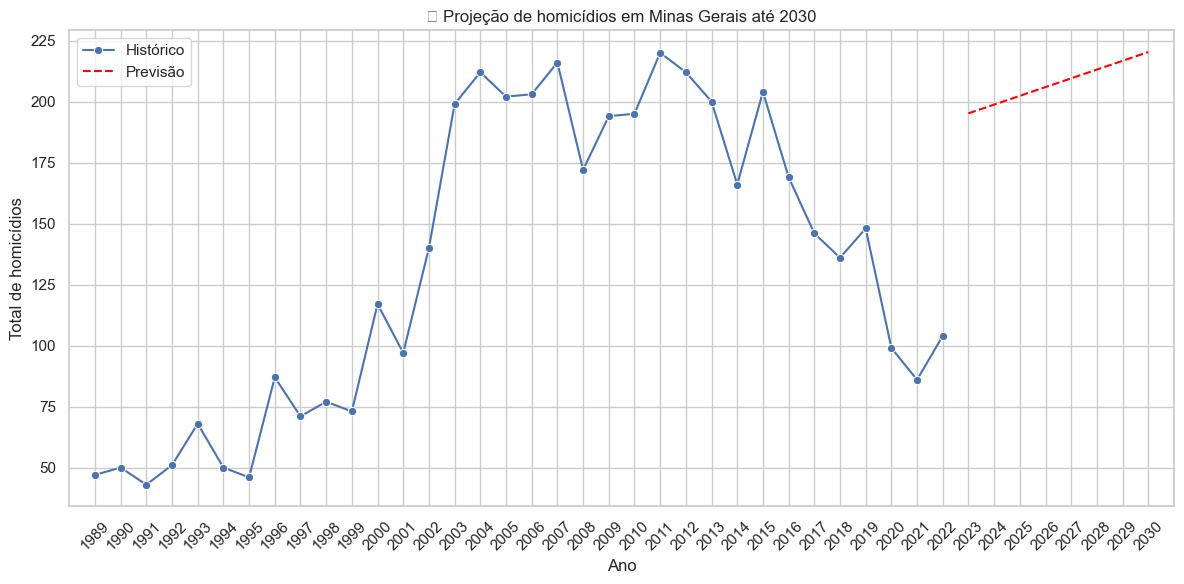

In [10]:
# Preparando os dados:
df_mg_ano['ano_num'] = df_mg_ano['per√≠odo'].astype(int)
X = df_mg_ano[['ano_num']]
y = df_mg_ano['valor']

# Ajustando modelo:
modelo = LinearRegression()
modelo.fit(X, y)

# Previs√£o at√© 2030:
anos_futuros = pd.DataFrame({'ano_num': range(df_mg_ano['ano_num'].max() + 1, 2031)})
anos_futuros['previsao'] = modelo.predict(anos_futuros)

# Plot:
plt.figure()
sns.lineplot(data=df_mg_ano, x='ano_num', y='valor', label='Hist√≥rico', marker='o')
sns.lineplot(data=anos_futuros, x='ano_num', y='previsao', label='Previs√£o', linestyle='--', color='red')

# T√≠tulo e r√≥tulos:
plt.title("üìà Proje√ß√£o de homic√≠dios em Minas Gerais at√© 2030")
plt.xlabel("Ano")
plt.ylabel("Total de homic√≠dios")

# Ajustando os xticks para uma visualiza√ß√£o mais limpa:
xticks = list(df_mg_ano['ano_num']) + anos_futuros['ano_num'].tolist()
plt.xticks(xticks, rotation=45)  # Rotacionando para melhor visualiza√ß√£o
plt.xlim(df_mg_ano['ano_num'].min() - 1, anos_futuros['ano_num'].max() + 1)  # Garantir que o gr√°fico n√£o "encavalhe"

plt.tight_layout()
plt.show()


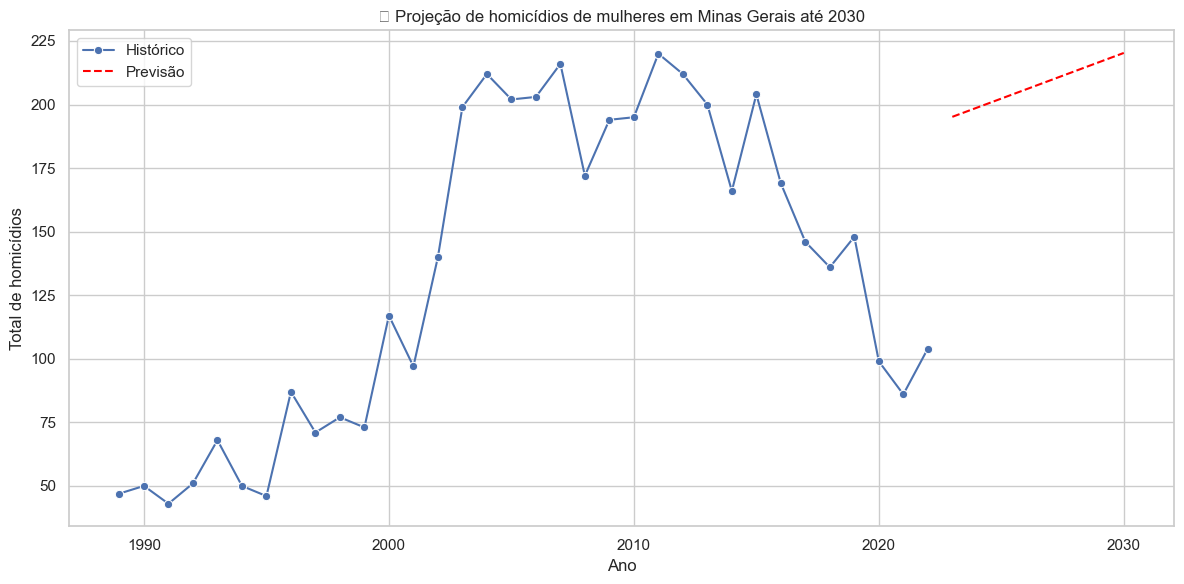

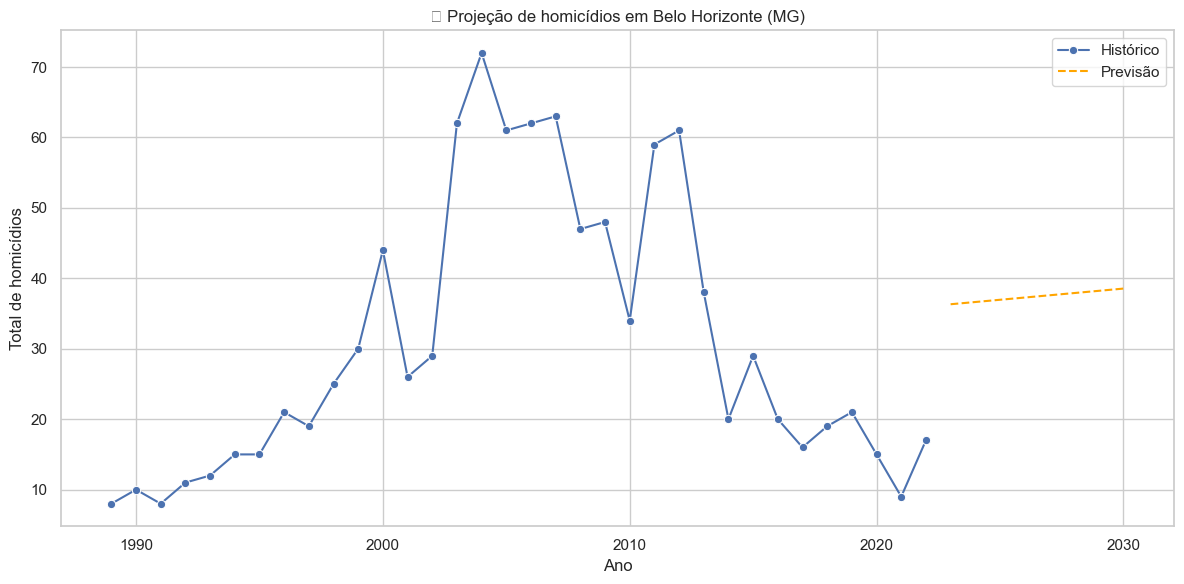

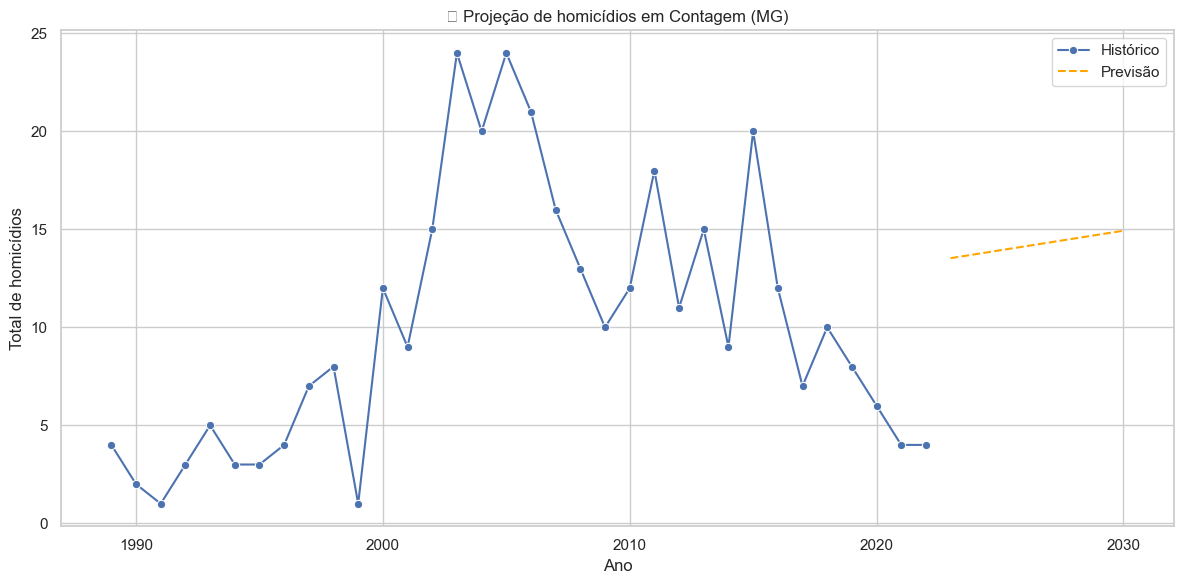

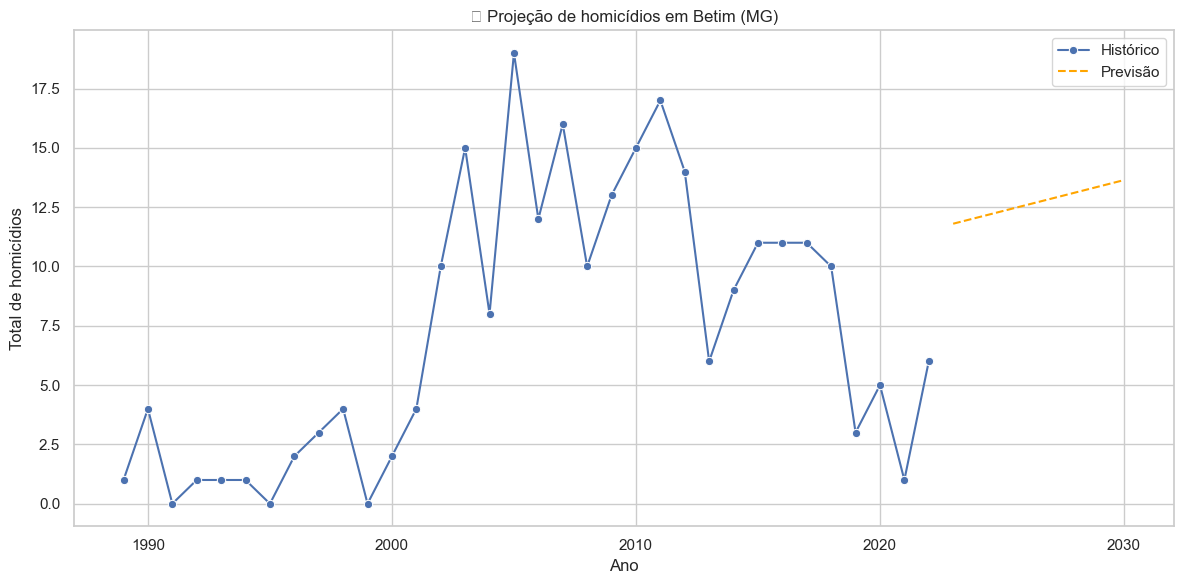

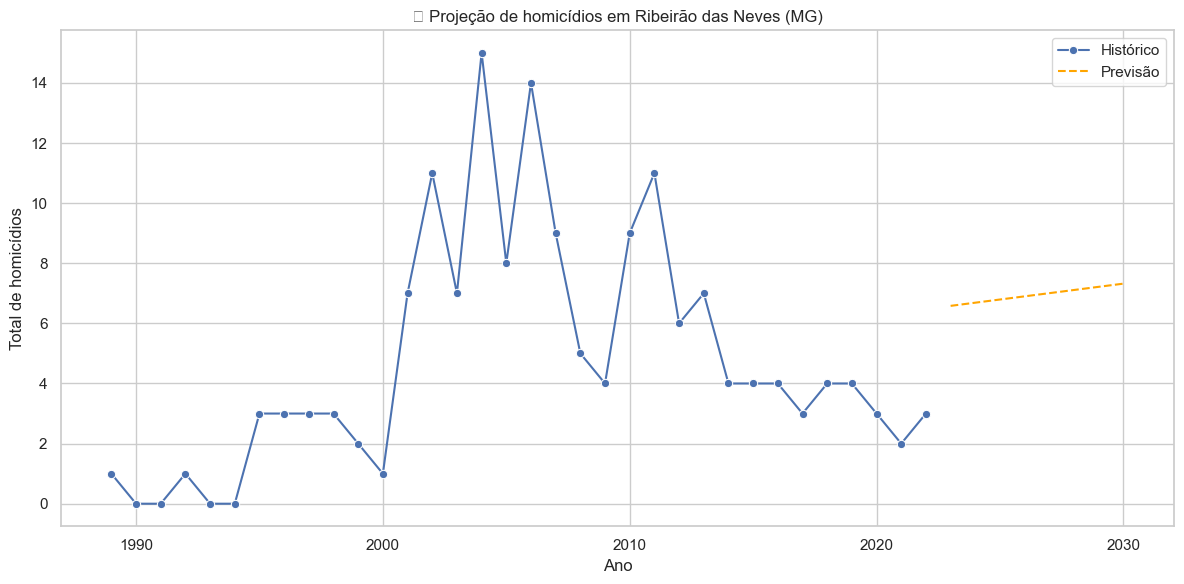

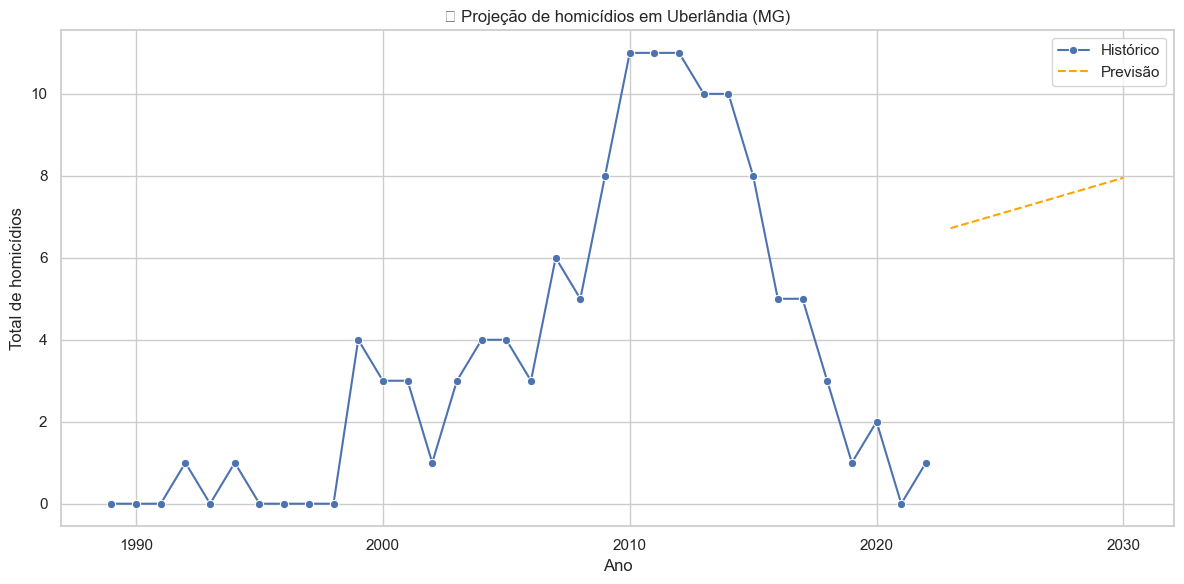

In [11]:
# Criando vari√°vel num√©rica de ano:
df['ano'] = df['per√≠odo'].astype(int)

# 1. Previs√£o para Minas Gerais:

df_mg = df[df['sigla_uf'] == 'MG']
df_mg_ano = df_mg.groupby('ano')['valor'].sum().reset_index()

X_mg = df_mg_ano[['ano']]
y_mg = df_mg_ano['valor']

modelo_mg = LinearRegression()
modelo_mg.fit(X_mg, y_mg)

anos_futuros = pd.DataFrame({'ano': range(df_mg_ano['ano'].max() + 1, 2031)})
anos_futuros['previsao'] = modelo_mg.predict(anos_futuros)

# Plot:
plt.figure()
sns.lineplot(data=df_mg_ano, x='ano', y='valor', marker='o', label='Hist√≥rico')
sns.lineplot(data=anos_futuros, x='ano', y='previsao', linestyle='--', color='red', label='Previs√£o')
plt.title("üìà Proje√ß√£o de homic√≠dios de mulheres em Minas Gerais at√© 2030")
plt.xlabel("Ano")
plt.ylabel("Total de homic√≠dios")
plt.tight_layout()
plt.show()

# 2. Previs√£o para 5 cidades com mais homic√≠dios em MG:

top_cidades_mg = df_mg.groupby('nome')['valor'].sum().sort_values(ascending=False).head(5).index.tolist()

for cidade in top_cidades_mg:
    df_cidade = df_mg[df_mg['nome'] == cidade].groupby('ano')['valor'].sum().reset_index()

    X_cidade = df_cidade[['ano']]
    y_cidade = df_cidade['valor']

    modelo_cidade = LinearRegression()
    modelo_cidade.fit(X_cidade, y_cidade)

    anos_futuros_cidade = pd.DataFrame({'ano': range(df_cidade['ano'].max() + 1, 2031)})
    anos_futuros_cidade['previsao'] = modelo_cidade.predict(anos_futuros_cidade)

    plt.figure()
    sns.lineplot(data=df_cidade, x='ano', y='valor', marker='o', label='Hist√≥rico')
    sns.lineplot(data=anos_futuros_cidade, x='ano', y='previsao', linestyle='--', color='orange', label='Previs√£o')
    plt.title(f"üìà Proje√ß√£o de homic√≠dios em {cidade} (MG)")
    plt.xlabel("Ano")
    plt.ylabel("Total de homic√≠dios")
    plt.tight_layout()
    plt.show()


____________

### üí° Alguns insights:

Embora trabalhamos aqui com univariadas, temos uma proje√ß√£o de como as taxas de homic√≠dio nas Minas Gerais, por exemplo, tendem a aumentar. O que nos gera os seguintes insights, para o caso de Minas Gerais, e que devem ser pensados para outros estados brasileiros:


#### 1. Tend√™ncia de Crescimento ou Diminui√ß√£o

**Observa√ß√£o:** A linha hist√≥rica de homic√≠dios ao longo dos anos mostra a evolu√ß√£o da taxa de homic√≠dios, e a linha de previs√£o at√© 2030 revela a tend√™ncia futura.

**Insight:** observamos que a previs√£o mostra uma tend√™ncia crescente, isso pode indicar a necessidade de refor√ßar pol√≠ticas p√∫blicas de seguran√ßa.

#### 2. Identifica√ß√£o de Padr√µes Temporais

**Observa√ß√£o:** Ao observar o comportamento da linha hist√≥rica, √© poss√≠vel verificar se h√° anos com picos de homic√≠dios e, em seguida, uma queda. Esses padr√µes podem estar associados a eventos espec√≠ficos, como mudan√ßas pol√≠ticas, opera√ß√µes de seguran√ßa, crises econ√¥micas, entre outros fatores.

**Insight:** analisar o ano em que ocorre o pico ou a queda significativa pode oferecer dados valiosos para explicar esses eventos. Isso pode ajudar a direcionar pol√≠ticas p√∫blicas para √°reas espec√≠ficas ou estrat√©gias de seguran√ßa.

#### 3. Previs√£o de Riscos para o Futuro

**Observa√ß√£o:** A previs√£o at√© 2030 pode fornecer um cen√°rio de risco a ser monitorado.

**Insight:** se a proje√ß√£o indica um aumento constante ou abrupto, seria crucial antecipar pol√≠ticas p√∫blicas para combater esse crescimento, incluindo aumento de policiamento, investimentos em preven√ß√£o de crimes, programas sociais, ou mais treinamentos para as for√ßas de seguran√ßa.

#### 4. Impacto de Interven√ß√µes

**Observa√ß√£o:** Se a linha de previs√£o for feita ap√≥s uma interven√ß√£o ou mudan√ßa significativa (por exemplo, uma grande opera√ß√£o de seguran√ßa), a compara√ß√£o entre a previs√£o antes e depois da interven√ß√£o pode mostrar se essa a√ß√£o teve um impacto positivo na redu√ß√£o de homic√≠dios.

**Insight:** isso pode ajudar a validar o impacto de pol√≠ticas p√∫blicas e orientar futuras a√ß√µes de seguran√ßa.

#### 5. Planejamento e Aloca√ß√£o de Recursos

**Observa√ß√£o:** O aumento ou diminui√ß√£o projetada de homic√≠dios pode indicar a necessidade de alocar recursos de forma mais eficiente, seja em policiamento, servi√ßos de apoio √† v√≠tima, programas de preven√ß√£o de crimes ou apoio a fam√≠lias.

**Insight:** um crescimento nas previs√µes pode justificar um aumento no or√ßamento para seguran√ßa p√∫blica, enquanto uma diminui√ß√£o pode permitir redirecionamento de recursos para outras √°reas sociais.

#### 6. Compara√ß√µes Regionais

**Observa√ß√£o:** Esse modelo de previs√£o poderia ser replicado para outras regi√µes ou estados do Brasil, permitindo compara√ß√µes regionais.

**Insight:** se Minas Gerais est√° apresentando uma diminui√ß√£o nas taxas de homic√≠dios, isso pode servir de exemplo ou modelo para outras regi√µes com problemas semelhantes. Ou, se o estado estiver aumentando, isso pode indicar que pol√≠ticas em outras regi√µes s√£o mais eficazes.

#### 7. Tomada de Decis√µes Proativas

**Observa√ß√£o:** A previs√£o at√© 2030 n√£o apenas indica o que pode acontecer, mas tamb√©m permite que as autoridades se antecipem e tomem decis√µes informadas.

**Insight:** a utiliza√ß√£o de modelos preditivos pode servir como uma ferramenta para planejamento estrat√©gico, permitindo ajustes em pol√≠ticas p√∫blicas e a√ß√µes de seguran√ßa antes que o problema se agrave.

#### 8. Rela√ß√£o com Outros Fatores Sociais e Econ√¥micos

**Observa√ß√£o:** a varia√ß√£o nos homic√≠dios pode estar correlacionada com fatores socioecon√¥micos, como desemprego, desigualdade, acesso a educa√ß√£o, entre outros.

**Insight:** ao realizar uma an√°lise mais profunda de vari√°veis adicionais, podemos encontrar fatores correlacionados e melhorar o entendimento sobre as causas dos homic√≠dios, o que permitiria direcionar pol√≠ticas p√∫blicas mais eficazes.

Nesse caso, podemos pensar para projetos futuros o trabalho com fontes externas relevantes para essas correla√ß√µes:


**1. Pol√≠ticas de Seguran√ßa P√∫blica**

üîéFontes de dados:

üóÇÔ∏è Secretarias de Seguran√ßa P√∫blica (SSP): Muitos estados brasileiros, incluindo Minas Gerais, publicam relat√≥rios anuais sobre a efic√°cia das suas pol√≠ticas de seguran√ßa p√∫blica.

üóÇÔ∏è Instituto de Pesquisa Econ√¥mica Aplicada (IPEA): Oferece dados sobre pol√≠ticas p√∫blicas e seguran√ßa.

üóÇÔ∏è Observat√≥rio de Seguran√ßa P√∫blica: Algumas organiza√ß√µes, como o F√≥rum Brasileiro de Seguran√ßa P√∫blica, coletam dados sobre a√ß√µes e impactos de pol√≠ticas de seguran√ßa.

üóÇÔ∏è DataSUS: O Sistema de Informa√ß√µes sobre Mortalidade do SUS pode fornecer dados sobre viol√™ncia e pol√≠ticas de sa√∫de p√∫blica associadas.

Como usar no modelo: Pode-se adicionar vari√°veis como a intensidade e a quantidade de opera√ß√µes de seguran√ßa, investimentos em seguran√ßa p√∫blica, ou eventos espec√≠ficos como a cria√ß√£o de novos programas de seguran√ßa.

**2. Taxa de Desemprego**

üîéFontes de dados:

üóÇÔ∏è Instituto Brasileiro de Geografia e Estat√≠stica (IBGE): Publica os dados do desemprego atrav√©s da Pesquisa Nacional por Amostra de Domic√≠lios (PNAD).

üóÇÔ∏è Instituto de Pesquisa Econ√¥mica Aplicada (IPEA): Tamb√©m oferece dados detalhados sobre o desemprego e suas varia√ß√µes.

üóÇÔ∏è Funda√ß√£o Get√∫lio Vargas (FGV): Produz √≠ndices e relat√≥rios sobre o mercado de trabalho no Brasil, incluindo dados sobre o desemprego.

Como usar no modelo: A taxa de desemprego pode ser uma vari√°vel importante, pois, geralmente, um aumento no desemprego est√° associado ao aumento de crimes. Pode-se criar uma vari√°vel que indique a taxa de desemprego em Minas Gerais para cada ano.

**3. Desigualdade Social (√çndice de Gini)**

üîéFontes de dados:

üóÇÔ∏è IBGE: O IBGE publica dados de desigualdade, incluindo o √çndice de Gini, que mede a distribui√ß√£o de renda no Brasil.

üóÇÔ∏è IPEA: O IPEA tamb√©m disponibiliza informa√ß√µes detalhadas sobre desigualdade de renda e riqueza.

üóÇÔ∏è Atlas da Viol√™ncia (Instituto de Pesquisa Econ√¥mica Aplicada ‚Äì IPEA e F√≥rum Brasileiro de Seguran√ßa P√∫blica): Publica anualmente o Atlas da Viol√™ncia, que traz informa√ß√µes sobre desigualdade social e viol√™ncia no Brasil.

Como usar no modelo: A desigualdade social √© um dos principais fatores que influenciam o crime. Ao incluir o √≠ndice de Gini para cada ano ou cada cidade/estado, √© poss√≠vel capturar a rela√ß√£o entre desigualdade e homic√≠dios.


_____________


üìä **by Victor Resende**